# Refactor polygon boundedness check ([LazySets#1925](https://github.com/JuliaReach/LazySets.jl/issues/1925))

In [1]:
using Revise, ReachabilityAnalysis

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/ReachabilityAnalysis/fYI0z.ji for ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1240


In [ ]:
@system

In [3]:
H = rand(HPolygon)

HPolygon{Float64}(HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[HalfSpace{Float64,Array{Float64,1}}([1.261028856189669, 1.3878735112026346], 1.2919114867674186), HalfSpace{Float64,Array{Float64,1}}([0.13162348864246542, 0.46729639650253496], 0.6960427258834989), HalfSpace{Float64,Array{Float64,1}}([-0.2847803843054808, 0.502842596864258], 1.328225752651445), HalfSpace{Float64,Array{Float64,1}}([-1.5904476178889724, -1.09839250216917], 1.2166533887508149), HalfSpace{Float64,Array{Float64,1}}([-0.6061499025734981, -0.6318548474879431], 0.4643511951445736), HalfSpace{Float64,Array{Float64,1}}([1.0887255599358168, -0.6277651549123144], 0.2398672848766943)])

In [8]:
using BenchmarkTools

In [9]:
@btime isbounded($H, false)

  44.787 μs (286 allocations: 18.61 KiB)


true

In [12]:
45e-6 * 20_000

0.9

In [10]:
@which isbounded(H, false)

isbounded(P::AbstractHPolygon, use_type_assumption::Bool) in LazySets at /home/mforets/.julia/dev/LazySets/src/Interfaces/AbstractHPolygon.jl:576

In [17]:
@which isbounded_unit_dimensions(HPolyhedron(H.constraints))

isbounded_unit_dimensions(S::LazySet{N}) where N<:Real in LazySets at /home/mforets/.julia/dev/LazySets/src/Interfaces/LazySet.jl:248

In [20]:
H

HPolygon{Float64}(HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[HalfSpace{Float64,Array{Float64,1}}([1.261028856189669, 1.3878735112026346], 1.2919114867674186), HalfSpace{Float64,Array{Float64,1}}([0.13162348864246542, 0.46729639650253496], 0.6960427258834989), HalfSpace{Float64,Array{Float64,1}}([-0.2847803843054808, 0.502842596864258], 1.328225752651445), HalfSpace{Float64,Array{Float64,1}}([-1.5904476178889724, -1.09839250216917], 1.2166533887508149), HalfSpace{Float64,Array{Float64,1}}([-0.6061499025734981, -0.6318548474879431], 0.4643511951445736), HalfSpace{Float64,Array{Float64,1}}([1.0887255599358168, -0.6277651549123144], 0.2398672848766943)])

In [19]:
@btime isbounded_unit_dimensions($H)

  2.928 μs (72 allocations: 3.50 KiB)


true

# Add @ivp macro (MathematicalSystems#)

In [2]:
using Revise, MathematicalSystems 

Ueli has proposed to overload the `@system` macro with the initial condition, eg.

```julia
    @system(x' = -ax, x(0) ∈ X0)
```

# RA, linear

In [3]:
using Revise, ReachabilityAnalysis

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/ReachabilityAnalysis/fYI0z.ji for ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1240


In [4]:
#P = @ivp(x' = x, x(0) ∈ Interval(0, 1))
S = @system(x' = x)
P = InitialValueProblem(S, Interval(0, 1))

InitialValueProblem{LinearContinuousSystem{Bool,IdentityMultiple{Bool}},Interval{Float64,IntervalArithmetic.Interval{Float64}}}(LinearContinuousSystem{Bool,IdentityMultiple{Bool}}(Bool[1]), Interval{Float64,IntervalArithmetic.Interval{Float64}}([0, 1]))

In [5]:
solve(P, T=1.0)

UndefVarError: UndefVarError: BFFPSV18 not defined

# Symbolic interval matrix power

In [1]:
using Revise

In [3]:
using ModelingToolkit

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/ModelingToolkit/Qmdqu.ji for ModelingToolkit [961ee093-0014-501f-94e3-6117800e7a78]
└ @ Base loading.jl:1240


In [4]:
@variables A[1:2, 1:2]

(Operation[A₁̒₁ A₁̒₂; A₂̒₁ A₂̒₂],)

In [9]:
A2 = A * A

2×2 Array{Operation,2}:
 A₁̒₁ * A₁̒₁ + A₁̒₂ * A₂̒₁  A₁̒₁ * A₁̒₂ + A₁̒₂ * A₂̒₂
 A₂̒₁ * A₁̒₁ + A₂̒₂ * A₂̒₁  A₂̒₁ * A₁̒₂ + A₂̒₂ * A₂̒₂

In [10]:
A2

2×2 Array{Operation,2}:
 A₁̒₁ * A₁̒₁ + A₁̒₂ * A₂̒₁  A₁̒₁ * A₁̒₂ + A₁̒₂ * A₂̒₂
 A₂̒₁ * A₁̒₁ + A₂̒₂ * A₂̒₁  A₂̒₁ * A₁̒₂ + A₂̒₂ * A₂̒₂

In [2]:
using IntervalMatrices

In [3]:
A = [Interval(1, 1) Interval(0, 1); Interval(1, 1) Interval(-1, -1)] |> IntervalMatrix

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [1, 1]    [0, 1]
 [1, 1]  [-1, -1]

In [4]:
square(A)

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [1, 2]  [0, 0]
 [0, 0]  [1, 2]

In [5]:
A * A

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [1, 2]  [-1, 1]
 [0, 0]   [1, 2]

In [6]:
using SymEngine

In [70]:
@vars M[1:2]

LoadError: AssertionError: @syms expected a list of symbols

In [60]:
M = [a b; c d]

2×2 Array{Basic,2}:
 a  b
 c  d

In [25]:
M² = M * M

2×2 Array{Basic,2}:
 b*c + a^2  a*b + b*d
 a*c + c*d  b*c + d^2

In [40]:
expr = M²[1, 2]

a*b + b*d

In [38]:
M³ = M * M * M

2×2 Array{Basic,2}:
 a*(b*c + a^2) + c*(a*b + b*d)  b*(b*c + a^2) + d*(a*b + b*d)
 a*(a*c + c*d) + c*(b*c + d^2)  b*(a*c + c*d) + d*(b*c + d^2)

In [56]:
expr = M³[1, 1]

a*(b*c + a^2) + c*(a*b + b*d)

In [57]:
ex = convert(Expr, expr)

:(c * (b * d + a * b) + a * (b * c + a ^ 2))

Idea from: https://discourse.julialang.org/t/substitute-symbols-in-expression/23099

In [7]:
using MacroTools: postwalk

function matsubs(ex)
    if ex == :a
        return A[1, 1]
    elseif ex == :b
        return A[1, 2]
    elseif ex == :c
        return A[2, 1]
    elseif ex == :d
        return A[2, 2]
    else
        return ex
    end
end

eval(postwalk(matsubs, ex))

UndefVarError: UndefVarError: ex not defined

In [72]:
using MacroTools: postwalk

ex = :(x + x^2 + x^3)
postwalk(ex -> ex == :x ? Interval(0, 1) : ex, ex)

:([0, 1] + [0, 1] ^ 2 + [0, 1] ^ 3)

In [73]:
eval(ans)

[0, 3]

In [59]:
postwalk(ex -> ex == :a ? Interval(0, 1) : ex, ex)

:(c * (b * d + [0, 1]b) + [0, 1] * (b * c + [0, 1] ^ 2))

In [33]:
subs(M²[1, 1], a=> 2.0)

4.0 + b*c

In [36]:
subs(M3[1, 1], a=>Interval(0, 1), b=>Interval(0, 1), c=>Interval(0, 1), d=>Interval(0, 1))

StackOverflowError: StackOverflowError:

In [82]:
using BenchmarkTools

In [85]:
f(n) = M^n;

@btime f(10)

  13.011 μs (64 allocations: 1.28 KiB)


2×2 Array{Basic,2}:
 (a*b + b*d)*(((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2))*((a*b + b*d)*(a*c + c*d) + (b*c + a^2)^2) + ((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2))*((a*b + b*d)*(a*c + c*d) + (b*c + d^2)^2)) + (b*c + a^2)*(((a*b + b*d)*(b*c + a^2) + (a*b + b*d)*(b*c + d^2))*((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2)) + ((a*b + b*d)*(a*c + c*d) + (b*c + a^2)^2)^2)  …  (a*b + b*d)*(((a*b + b*d)*(b*c + a^2) + (a*b + b*d)*(b*c + d^2))*((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2)) + ((a*b + b*d)*(a*c + c*d) + (b*c + d^2)^2)^2) + (((a*b + b*d)*(b*c + a^2) + (a*b + b*d)*(b*c + d^2))*((a*b + b*d)*(a*c + c*d) + (b*c + a^2)^2) + ((a*b + b*d)*(b*c + a^2) + (a*b + b*d)*(b*c + d^2))*((a*b + b*d)*(a*c + c*d) + (b*c + d^2)^2))*(b*c + a^2)
 (a*c + c*d)*(((a*b + b*d)*(b*c + a^2) + (a*b + b*d)*(b*c + d^2))*((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2)) + ((a*b + b*d)*(a*c + c*d) + (b*c + a^2)^2)^2) + (((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2))*((a*b + b*d)*(a

In [86]:
[@btime f($i) for i in 1:10]

  43.105 ns (1 allocation: 112 bytes)
  3.289 μs (17 allocations: 336 bytes)
  6.408 μs (30 allocations: 640 bytes)
  6.638 μs (34 allocations: 672 bytes)
  9.689 μs (47 allocations: 976 bytes)
  9.722 μs (47 allocations: 976 bytes)
  12.926 μs (60 allocations: 1.25 KiB)
  10.483 μs (51 allocations: 1008 bytes)
  13.045 μs (64 allocations: 1.28 KiB)
  13.124 μs (64 allocations: 1.28 KiB)


In [89]:
n = 10
Ms = Matrix{SymEngine.Basic}(undef, n, n)

10×10 Array{Basic,2}:
 #undef  #undef  #undef  #undef  #undef  …  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  …  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef

In [8]:
subidx(i) = join(Char.(0x2080 .+ convert.(UInt16, digits(i)[end:-1:1])))

subidx (generic function with 1 method)

In [11]:
n = 2
# create a new symbolic matrix of order n with name M
# e.g. for order n = 2,
# _symbolic_matrix(2)
# 2×2 Array{Basic,2}:
# M₁₁  M₁₂
# M₂₁  M₂₂
#
function _symbolic_matrix(n; name="M")
    M = Matrix{SymEngine.Basic}(undef, n, n)
    for i in 1:n, j in 1:n
        M[i, j] = name * subidx(i) * subidx(j)
    end
    return M
end

_symbolic_matrix (generic function with 1 method)

In [41]:
Asym = _symbolic_matrix(2, name="A")

2×2 Array{Basic,2}:
 A₁₁  A₁₂
 A₂₁  A₂₂

In [40]:
A

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [1, 1]    [0, 1]
 [1, 1]  [-1, -1]

Now we would like to substitute the interval matrix `A` into the symbolic matrix `A` after taking some power.

In [42]:
Asym² = Asym^2

2×2 Array{Basic,2}:
   A₁₂*A₂₁ + A₁₁^2  A₁₁*A₁₂ + A₁₂*A₂₂
 A₁₁*A₂₁ + A₂₂*A₂₁    A₁₂*A₂₁ + A₂₂^2

MacroTools to the rescue.

In [23]:
using MacroTools: postwalk

In [43]:
Asym²_11 = Asym²[1, 1]

A₁₂*A₂₁ + A₁₁^2

In [62]:
ex = Asym²_11
ex = convert(Expr, ex) # important (!)

:(A₁₂ * A₂₁ + A₁₁ ^ 2)

In [87]:
function subs(ex, imat, n; name="M")
    #println(ex)
    for i in 1:n, j in 1:n
        name_ij = Symbol(name * subidx(i) * subidx(j))
        if ex == name_ij
            return imat[i, j]
        end
    end
    return ex
end

subs (generic function with 2 methods)

In [86]:
postwalk(ex -> subs(ex, A, n, name="A"), ex)

+
*
A₁₂
A₂₁
[0, 1] * [1, 1]
^
A₁₁
2
[1, 1] ^ 2
[0, 1] * [1, 1] + [1, 1] ^ 2


:([0, 1] * [1, 1] + [1, 1] ^ 2)

In [89]:
res = postwalk(ex -> subs(ex, A, n, name="A"), ex)

:([0, 1] * [1, 1] + [1, 1] ^ 2)

In [90]:
eval(res)

[1, 2]

In [96]:
:x

:x

See also:

- https://github.com/chakravala/Reduce.jl

## SUE for quadratic expansion

https://github.com/JuliaReach/IntervalMatrices.jl/issues/90

If we consider $\alpha A + \beta A^2$ for scalar coefficients $\alpha$ and $\beta$, the SUE formula generalizes what we have written for `quadratic_term` and for `square`. The picture below shores the result.

<img src="20200127_151926.jpg" alt="SUE expression computation" style="width: 700px;"/>

In [33]:
] add IntervalArithmetic#v0.16.2

  Updating git-repo `https://github.com/JuliaIntervals/IntervalArithmetic.jl.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
  [d1acc4aa] ↓ IntervalArithmetic v0.16.3 #master (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git) ⇒ v0.16.2 #v0.16.2 (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git)
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [d1acc4aa] ↓ IntervalArithmetic v0.16.3 #master (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git) ⇒ v0.16.2 #v0.16.2 (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git)


In [1]:
using Revise, IntervalMatrices, BenchmarkTools

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/IntervalMatrices/VerWp.ji for IntervalMatrices [5c1f47dc-42dd-5697-8aaa-4d102d140ba9]
└ @ Base loading.jl:1240


In [3]:
n = 2
M = rand(IntervalMatrix, n, n)
@btime square($M)

  3.511 μs (76 allocations: 2.94 KiB)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [0.670644, 2.87752]  [-1.66151, 1.47012]
 [0.104481, 1.40329]   [1.54601, 2.73823]

In [7]:
# initial implementation
@btime quadratic_expansion($M, 0.0, 1.0)

  189.864 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [0.670644, 2.87752]  [-1.66151, 1.47012]
 [0.104481, 1.40329]   [1.54601, 2.73823]

In [8]:
# using combine
@btime quadratic_expansion($M, 0.0, 1.0)

  252.130 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [0.670644, 2.87752]  [-1.66151, 1.47012]
 [0.104481, 1.40329]   [1.54601, 2.73823]

In [9]:
250e-9 / 189e-9

1.3227513227513226

In [6]:
square(M) .≈ quadratic_expansion(M, 0.0, 1.0)

2×2 BitArray{2}:
 1  1
 1  1

In [10]:
square(M)[1, 1]

[-2.98092, 3.70507]

In [11]:
quadratic_expansion(M, 0.0, 1.0)[1, 1]

[-3.69527, 3.70507]

In [15]:
M[1, 1] * M[1, 1]

[-0.714357, 1.32575]

In [14]:
M[1, 1]^2

[0, 1.32575]

In [16]:
M[1, 1]

[-0.620419, 1.15142]

In [3]:
n = 3
M = rand(IntervalMatrix, n, n)

@btime square($M)
@btime quadratic_expansion($M, 0.0, 1.0)

  5.569 μs (119 allocations: 4.88 KiB)
  615.316 ns (2 allocations: 240 bytes)


3×3 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-3.69527, 3.70507]   [0.647382, 5.8043]  [-1.62979, 4.76579] 
 [-3.1649, 1.4932]     [1.40321, 3.02977]  [-0.719162, 2.57553]
 [-1.71061, 6.71739]  [-3.83558, 1.78861]  [-0.811522, 7.90614]

In [14]:
# using combine
n = 3
M = rand(IntervalMatrix, n, n)

@btime square($M)
@btime quadratic_expansion($M, 0.0, 1.0)

  5.505 μs (119 allocations: 4.88 KiB)
  688.417 ns (2 allocations: 240 bytes)


3×3 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-2.11219, 1.51825]      [-0.997867, 2.81586]  [-1.76149, 0.719917]
 [-6.16308, 0.597035]     [-2.66268, 3.4297]    [-2.85342, 0.634418]
 [-0.000393768, 3.23073]  [-1.77136, 2.42684]   [-0.141062, 1.2453] 

In [15]:
square(M)

3×3 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-2.11219, 1.51825]      [-0.997867, 2.81586]  [-1.76149, 0.719917]
 [-6.16308, 0.597035]     [-2.66268, 3.4297]    [-2.85342, 0.634418]
 [-0.000393768, 3.23073]  [-1.77136, 2.42684]   [-0.141062, 1.2453] 

In [16]:
quadratic_expansion(M, 0.0, 1.0)

3×3 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-2.11219, 1.51825]      [-0.997867, 2.81586]  [-1.76149, 0.719917]
 [-6.16308, 0.597035]     [-2.66268, 3.4297]    [-2.85342, 0.634418]
 [-0.000393768, 3.23073]  [-1.77136, 2.42684]   [-0.141062, 1.2453] 

In [31]:
@noinline function f()
    return pow(Interval(-1, 1), 10)
end

@btime f()

  68.493 ns (0 allocations: 0 bytes)


[0, 1]

In [22]:
Interval(-1, 1) * Interval(-1, 1)

[-1, 1]

In [11]:
using Revise, IntervalArithmetic
using BenchmarkTools
using IntervalMatrices

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/IntervalMatrices/VerWp.ji for IntervalMatrices [5c1f47dc-42dd-5697-8aaa-4d102d140ba9]
└ @ Base loading.jl:1240


In [6]:
f(x) = x^2
y = Interval(0, 1)
@btime f($y)

  947.348 ns (29 allocations: 1.25 KiB)


[0, 1]

In [17]:
Wstar(A, δ) = 1/2 * A * δ^2 + 1/2 * A^2 * δ^3

Wstar (generic function with 1 method)

In [54]:
A = rand(IntervalMatrix) * 100

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-143.198, 51.5174]   [-52.0361, -47.4452]
 [-121.98, -21.5745]  [-105.322, 47.0649]  

In [55]:
δ = 0.01
Ws = Wstar(A, δ)

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.0103367, 0.0160024]  [-0.00516672, 0.00409371]
 [-0.0121116, 0.0140785]  [-0.00723271, 0.0110732] 

In [56]:
Wqe = quadratic_expansion(A, 1/2*δ^2, 1/2*δ^3)

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.0103367, 0.00707657]  [-0.00516672, 0.00386417]
 [-0.0121116, 0.00905817]  [-0.00723271, 0.00663447]

In [57]:
diam(Ws) - diam(Wqe)

2×2 Array{Float64,2}:
 0.00892577  0.000229537
 0.00502027  0.00443872 

## Faster square

In [3]:
using IntervalMatrices: square_v2

In [14]:
n = 2
M = rand(IntervalMatrix, n, n)
@btime square($M)

  3.366 μs (88 allocations: 3.89 KiB)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
  [0.0409632, 4.74014]  [-1.66928, 5.37961]  
 [-1.49507, 4.81819]     [0.0409632, 5.80631]

In [15]:
@btime square_v2($M)

  162.732 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
  [0.0409632, 4.74014]  [-1.66928, 5.37961]  
 [-1.49507, 4.81819]     [0.0409632, 5.80631]

In [16]:
opnorm(diam(square(M)) .- diam(square_v2(M)))

0.0

Most of the speedup comes from using `pow` instead of `^` in IntervalArithmetic. See https://github.com/JuliaIntervals/IntervalArithmetic.jl/pull/210#issuecomment-578943429

# ProfileVega 

┌ Info: Precompiling ProfileVega [4391764f-db79-4bd7-a4c6-f9062de4300e]
└ @ Base loading.jl:1242
WARN Can not resolve event source: window
WARN Can not resolve event source: window


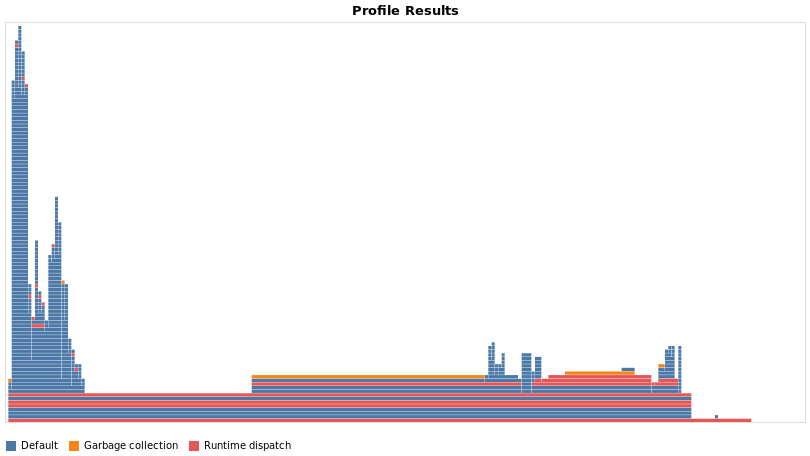

WARN Can not resolve event source: window
WARN Can not resolve event source: window


In [62]:
function profile_test(n)
    for i = 1:n
        A = randn(100,100,20)
        m = maximum(A)
        Am = mapslices(sum, A; dims=2)
        B = A[:,:,5]
        Bsort = mapslices(sort, B; dims=1)
        b = rand(100)
        C = B.*b
    end
end

profile_test(1)   # run once to compile

using Profile, ProfileVega
Profile.clear()
@profview profile_test(10)

# Function arguments

In [65]:
using ExprTools

┌ Info: Precompiling ExprTools [e2ba6199-217a-4e67-a87a-7c52f15ade04]
└ @ Base loading.jl:1242


In [70]:
expr = :(function f(x, y)
    return x + y
end)

:(function f(x, y)
      #= In[70]:2 =#
      return x + y
  end)

In [71]:
splitdef(expr)

Dict{Symbol,Any} with 4 entries:
  :args => Any[:x, :y]
  :body => quote…
  :name => :f
  :head => :function

In [ ]:
splitdef()

In [73]:
splitdef(:())

Dict{Symbol,Any} with 4 entries:
  :args => Any[:x, :y]
  :body => quote…
  :name => :q
  :head => :(=)

In [74]:
q(x, y) = x + y

q (generic function with 1 method)

In [75]:
q

q (generic function with 1 method)

In [78]:
q

q (generic function with 1 method)

q (generic function with 1 method)

# Interval matrices stuff

In [83]:
using Revise, IntervalMatrices

In [84]:
abs(M::IntervalMatrix) = IntervalMatrix(map(abs, M))

abs (generic function with 1 method)

In [92]:
[size(rand(IntervalMatrix, i), 2) for i in 2:5]

4-element Array{Int64,1}:
 2
 2
 2
 2

In [94]:
M = rand(IntervalMatrix)

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-1.08115, 0.404159]     [0.318708, 1.48657]
  [0.0209044, 0.343184]  [-1.11279, 0.369965]

In [98]:
M

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-1.08115, 0.404159]     [0.318708, 1.48657]
  [0.0209044, 0.343184]  [-1.11279, 0.369965]

In [104]:
methodswith(typeof(M), IntervalMatrices, supertypes=true)

[1] diam(A::IntervalMatrix{T,IT,MT} where MT<:AbstractArray{IT,2} where IT<:Interval{T}) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:278
[2] dot(x::AbstractArray, y::AbstractArray) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/generic.jl:786
[3] expm_overapproximation(A::IntervalMatrix{T,Interval{T},MT} where MT<:AbstractArray{Interval{T},2}, t, p) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/exponential.jl:77
[4] expm_underapproximation(A::IntervalMatrix{T,Interval{T},MT} where MT<:AbstractArray{Interval{T},2}, t, p) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/exponential.jl:155
[5] inf(A::IntervalMatrix{T,IT,MT} where MT<:AbstractArray{IT,2} where IT<:Interval{T}) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:87
[6] isempty(a::AbstractArray) in Base at abstractarray.jl:917
[7] mid(A::IntervalMatrix{T,IT,MT} where MT<:AbstractArray{IT,2} where IT<:Interval{T}) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:123
[8] opnorm(A::IntervalMatrix) in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:65
[9] opnorm(A::IntervalMatrix, p::Real) in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:65
[10] opnorm(A::AbstractArray{T,2} where T) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/generic.jl:641
[11] opnorm(A::AbstractArray{T,2} where T, p::Real) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/generic.jl:641
[12] quadratic_expansion(A::IntervalMatrix, t) in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/exponential.jl:20
[13] rand(rng::Random.AbstractRNG, range::AbstractArray, ::Type{SA}) where SA<:StaticArrays.StaticArray in StaticArrays at /home/mforets/.julia/packages/StaticArrays/1g9bq/src/arraymath.jl:55
[14] rand(range::AbstractArray, ::Type{SA}) where SA<:StaticArrays.StaticArray in StaticArrays at /home/mforets/.julia/packages/StaticArrays/1g9bq/src/arraymath.jl:56
[15] sample(A::IntervalMatrix{T,IT,MT} where MT<:AbstractArray{IT,2} where IT<:Interval{T}) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:252
[16] square(A::IntervalMatrix) in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/arithmetic.jl:49
[17] sup(A::IntervalMatrix{T,IT,MT} where MT<:AbstractArray{IT,2} where IT<:Interval{T}) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:105

In [106]:
inf(M)

2×2 Array{Float64,2}:
 -1.08114     0.318708
  0.0209045  -1.11278 

In [107]:
M

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-1.08115, 0.404159]     [0.318708, 1.48657]
  [0.0209044, 0.343184]  [-1.11279, 0.369965]

In [108]:
sup(M)

2×2 Array{Float64,2}:
 0.404159  1.48657 
 0.343183  0.369964

### Comparing different square implementations

In [1]:
using Revise, IntervalMatrices, BenchmarkTools

In [3]:
M = rand(IntervalMatrix, 2)

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
  [0.360505, 1.21019]   [0.0860038, 0.653283]
 [-0.871612, 1.14312]  [-0.784375, -0.281789]

In [10]:
# version in master, using ^
@btime square($M)

  3.540 μs (82 allocations: 3.41 KiB)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.38971, 4.40589]  [-2.81811, 1.33693] 
 [-4.33383, 2.05599]  [-0.270361, 3.52899]

In [8]:
# version in master, using pow
@btime square($M)

  187.382 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.38971, 4.40589]  [-2.81811, 1.33693] 
 [-4.33383, 2.05599]  [-0.270361, 3.52899]

In [9]:
# version in mforets/faster_square
@btime square($M)

┌ Warning: /home/mforets/.julia/packages/IntervalArithmetic/r2G4E/src/intervals/powers.jl no longer exists, deleting all methods
└ @ Revise /home/mforets/.julia/packages/Revise/S7mrl/src/Revise.jl:544


  3.506 μs (76 allocations: 2.94 KiB)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.439445, 2.21132]  [-0.276906, 0.606504]
 [-0.8092, 1.06126]    [-0.490004, 1.36202] 

In [8]:
] add IntervalArithmetic#v0.16.3

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %  Updating git-repo `https://github.com/JuliaIntervals/IntervalArithmetic.jl.git`
 Resolving package versions...


┌ Warning: julia version requirement for package ProfileVega not satisfied
└ @ Pkg.Operations /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Pkg/src/Operations.jl:225


  Updating `~/.julia/environments/v1.2/Project.toml`
  [d1acc4aa] ↑ IntervalArithmetic v0.16.1 #nonrecursive_powers (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git) ⇒ v0.16.3 #v0.16.3 (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git)
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [d1acc4aa] ↑ IntervalArithmetic v0.16.1 #nonrecursive_powers (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git) ⇒ v0.16.3 #v0.16.3 (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git)


In [7]:
(187 - 131) / 187.

0.2994652406417112

In [6]:
# version in mforets/faster_square using IntervalArithmetic/nonrecursive_powers branch
# it is ~30% faster and it requires A[j, j]^2
@btime square($M)

  131.246 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.439445, 2.21132]  [-0.276906, 0.606504]
 [-0.8092, 1.06126]    [-0.490004, 1.36202] 

In [9]:
using LinearAlgebra: checksquare

function square1(A::IntervalMatrix)
    B = similar(A.mat)
    n = checksquare(A)
    @inbounds for j in 1:n
        for i in 1:n
            if i == j
                res = A[i, i]^2
                for k in 1:n
                    if k != i
                        res += A[i, k] * A[k, i]
                    end
                end
                B[i, i] = res
            else
                res = A[i, j] * (A[i, i] + A[j, j])
                for k in 1:n
                    if k != i && k != j
                        res += A[i, k] * A[k, j]
                    end
                end
                B[i, j] = res
            end
        end
    end
    return IntervalMatrix(B)
end


function square2(A::IntervalMatrix)
    B = similar(A.mat)
    n = checksquare(A)
    @inbounds for j in 1:n
        for i in 1:n
            if i == j
                res = pow(A[i, i], 2)
                for k in 1:n
                    if k != i
                        res += A[i, k] * A[k, i]
                    end
                end
                B[i, i] = res
            else
                res = A[i, j] * (A[i, i] + A[j, j])
                for k in 1:n
                    if k != i && k != j
                        res += A[i, k] * A[k, j]
                    end
                end
                B[i, j] = res
            end
        end
    end
    return IntervalMatrix(B)
end

function square3(A::IntervalMatrix)
    B = similar(A.mat)
    n = checksquare(A)

    # case i == j
    @inbounds for j in 1:n
        B[j, j] = pow(A[j, j], 2)
        for k in 1:n
            k == j && continue
            B[j, j] += A[j, k] * A[k, j]
        end
    end

    # case i ≠ j
    @inbounds for j in 1:n
        for i in 1:n
            i == j && continue
            B[i, j] = A[i, j] * (A[j, j] + A[i, i])
            for k in 1:n
                (k == i || k == j) && continue
                B[i, j] += A[i, k] * A[k, j]
            end
        end
    end
    return IntervalMatrix(B)
end



square3 (generic function with 1 method)

In [13]:
M(n) = rand(IntervalMatrix, n, n)

M (generic function with 1 method)

In [16]:
A = M(2)
@btime square1($A)
@btime square2($A)
@btime square3($A)

  3.618 μs (76 allocations: 2.94 KiB)
  190.431 ns (2 allocations: 160 bytes)
  194.327 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-1.25059, 3.53102]  [-1.03455, 1.7526] 
 [-1.90802, 1.1263]   [-1.24879, 1.62835]

In [17]:
A = M(3)
@btime square1($A)
@btime square2($A)
@btime square3($A)

  5.742 μs (125 allocations: 5.36 KiB)
  477.474 ns (2 allocations: 240 bytes)
  475.337 ns (2 allocations: 240 bytes)


3×3 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.656142, 4.9118]    [-3.45663, 2.06806]   [-1.57504, 3.84137]  
 [-0.639579, 0.603528]  [-0.299172, 3.26549]  [-0.0851205, 1.37173]
 [-1.15943, 1.07962]    [-1.15623, 2.84543]   [-0.83474, 1.50957]  

In [18]:
A = M(4)
@btime square1($A)
@btime square2($A)
@btime square3($A)

  8.151 μs (162 allocations: 6.86 KiB)
  1.062 μs (2 allocations: 352 bytes)
  1.110 μs (2 allocations: 352 bytes)


4×4 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.77385, 3.1586]    [-5.96374, 0.463751]  …  [-1.85232, 1.24969]
 [-1.34601, 2.88996]   [-0.85282, 5.00584]       [0.322574, 2.7926]
 [-4.42465, 2.19834]   [-8.98576, 3.36581]      [-3.36595, 1.72967]
  [0.723541, 4.54881]  [-4.84278, 1.07695]      [-1.74098, 1.03039]

In [20]:
A = M(10)
@btime square1($A)
@btime square2($A)
@btime square3($A)

  48.360 μs (408 allocations: 18.55 KiB)
  26.618 μs (2 allocations: 1.78 KiB)
  25.823 μs (2 allocations: 1.78 KiB)


10×10 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-15.0596, 7.02558]    [-4.05335, 10.4616]  …  [-5.67069, 4.68377]
 [-14.0023, 13.3392]   [-11.1931, 10.7178]      [-8.80499, 4.18572]
 [-11.0766, 12.4657]    [-2.47059, 15.0889]     [-6.76096, 6.49717]
 [-11.1217, 7.7141]     [-7.8687, 6.08828]      [-3.34341, 5.20867]
  [-6.31673, 5.68484]   [-5.70728, 3.2717]      [-2.84294, 3.85157]
  [-7.25568, 13.3479]   [-9.15015, 8.93799]  …  [-6.34515, 4.75675]
  [-3.3215, 15.4359]    [-7.08864, 7.22597]     [-4.08259, 4.63538]
  [-8.03028, 8.93594]   [-3.91559, 5.20142]     [-3.35783, 4.63063]
  [-8.51068, 6.14291]   [-5.65711, 5.8831]      [-2.11419, 4.35483]
 [-10.1633, 12.437]    [-11.4491, 6.8883]       [-6.83925, 6.36304]

In [21]:
(1.110 - 1.062) / 1.110

0.04324324324324328

## Approximate Minkowski sum

In [132]:
using LazySets, Polyhedra, Plots, CDDLib

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/CDDLib/SMSjF.ji for CDDLib [3391f64e-dcde-5f30-b752-e11513730f60]
└ @ Base loading.jl:1240


In [135]:
X = [rand(HPolygon, dim=2) for _ in 1:3] |> MinkowskiSumArray;

In [140]:
Xred = convert(HPolytope, reduce(minkowski_sum, array(X)));

HPolytope{Float64}(LazySets.HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[LazySets.HalfSpace{Float64,Array{Float64,1}}([-3.1812828817119136, -1.0], 17.791559527242356), LazySets.HalfSpace{Float64,Array{Float64,1}}([-6.67173514654207, 1.0], 58.33118627110076), LazySets.HalfSpace{Float64,Array{Float64,1}}([-3.7839110251870887, -1.0], 22.136421771249463), LazySets.HalfSpace{Float64,Array{Float64,1}}([-2.099097248589142, -1.0], 10.263576543950858), LazySets.HalfSpace{Float64,Array{Float64,1}}([-2.6767411969641373, -1.0], 14.194606138468192), LazySets.HalfSpace{Float64,Array{Float64,1}}([-2.095415823278109, -1.0], 10.239600379688687), LazySets.HalfSpace{Float64,Array{Float64,1}}([-1.8342925862594592, -1.0], 8.637951820834619), LazySets.HalfSpace{Float64,Array{Float64,1}}([-1.369623470623105, -1.0], 5.803472485806184), LazySets.HalfSpace{Float64,Array{Float64,1}}([-1.1352332802956377, -1.0], 4.4344789672727405), LazySets.HalfSpace{Float64,Array{Float64,1}}([-1.0, -1.50541866327323

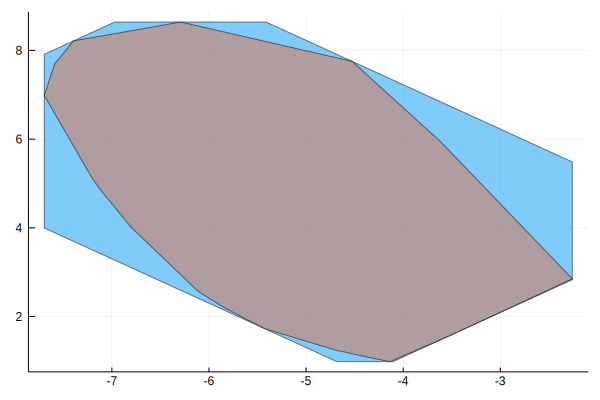

In [141]:
Y = overapproximate(X, OctDirections(2));
plot(Y)
plot!(Xred)

In [ ]:
Y = overapproximate(X, OctDirections(3));
plot(Y)

In [ ]:
Polyhedra
X = [rand(HPolytope, dim=3) for _ in 1:200] |> MinkowskiSumArray;